In [1]:
import xarray as xr
from netCDF4 import Dataset, num2date
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [2]:
data = xr.open_dataset("S2S_Data/precip_control.nc")
ds=Dataset("S2S_Data/precip_control.nc")

In [3]:
data

<xarray.Dataset>
Dimensions:     (time: 6, step: 185, latitude: 121, longitude: 240)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2024-01-01 2024-02-01 ... 2024-06-01
  * step        (step) timedelta64[ns] 0 days 00:00:00 ... 46 days 00:00:00
    surface     float64 ...
  * latitude    (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude   (longitude) float64 0.0 1.5 3.0 4.5 ... 354.0 355.5 357.0 358.5
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    tp          (time, step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-09T14:37 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
#pwd
#filepath=/projects/aija9929/Final_Project_ATOC4500_F24/S2S_Data/precip_refcst_control.nc'

In [5]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_edition: 2
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre: 0
    Conventions: CF-1.7
    institution: European Centre for Medium-Range Weather Forecasts
    history: 2024-12-09T14:37 GRIB to CDM+CF via cfgrib-0.9.14.1/ecCodes-2.39.0 with {"source": "S2S_Data/precip_control.grib", "filter_by_keys": {}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
    dimensions(sizes): time(6), step(185), latitude(121), longitude(240)
    variables(dimensions): int64 number(), int64 time(time), float64 step(step), float64 surface(), float64 latitude(latitude), float64 longitude(longitude), float64 valid_time(time, step), float32 tp(time, step, latitude, longitude)
    groups: 

In [6]:
step_array=ds.variables['step']
print(step_array)
step_array=ds.variables['step'][:]
print(step_array)

<class 'netCDF4._netCDF4.Variable'>
float64 step(step)
    _FillValue: nan
    long_name: time since forecast_reference_time
    standard_name: forecast_period
    units: hours
unlimited dimensions: 
current shape = (185,)
filling on
[   0.    6.   12.   18.   24.   30.   36.   42.   48.   54.   60.   66.
   72.   78.   84.   90.   96.  102.  108.  114.  120.  126.  132.  138.
  144.  150.  156.  162.  168.  174.  180.  186.  192.  198.  204.  210.
  216.  222.  228.  234.  240.  246.  252.  258.  264.  270.  276.  282.
  288.  294.  300.  306.  312.  318.  324.  330.  336.  342.  348.  354.
  360.  366.  372.  378.  384.  390.  396.  402.  408.  414.  420.  426.
  432.  438.  444.  450.  456.  462.  468.  474.  480.  486.  492.  498.
  504.  510.  516.  522.  528.  534.  540.  546.  552.  558.  564.  570.
  576.  582.  588.  594.  600.  606.  612.  618.  624.  630.  636.  642.
  648.  654.  660.  666.  672.  678.  684.  690.  696.  702.  708.  714.
  720.  726.  732.  738.  744.  750.

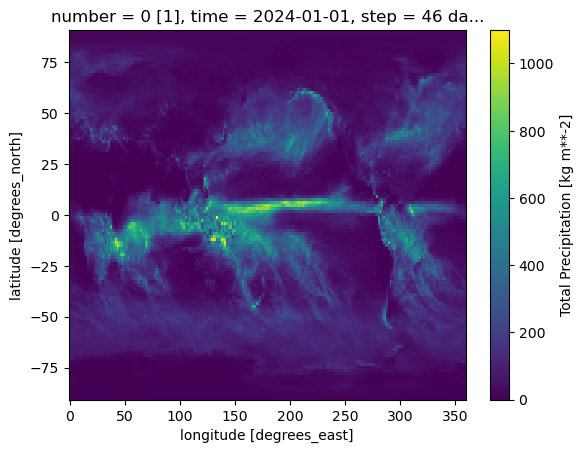

In [7]:
#da.sel(lat=50.5, lon=50.5).plot()
data.tp.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000').plot()

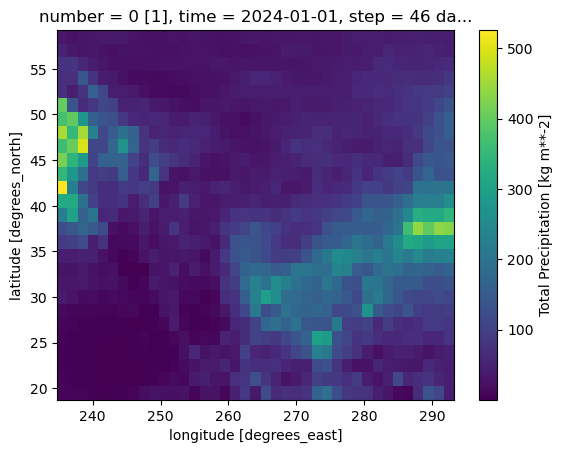

In [8]:
data.tp.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000',latitude=slice('60','19.5'), longitude=slice('235','293')).plot()
#for degrees west, to convert, take the westward coordinate as a negative value and add 360 degrees.
#for degrees north, keep the same

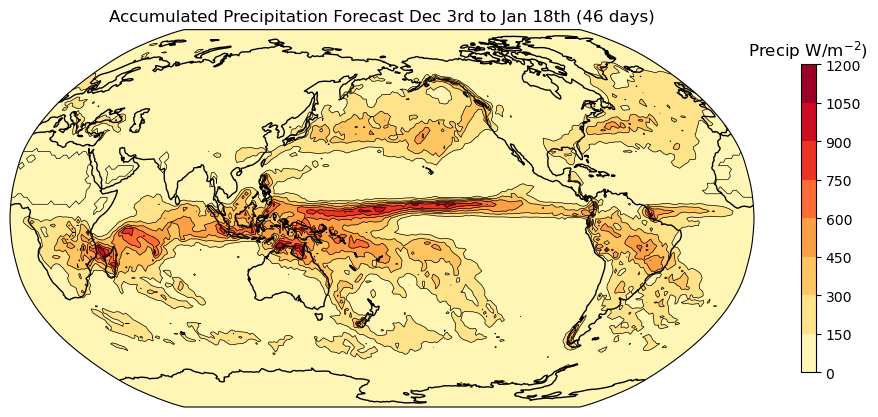

In [9]:
## Now let's make a projected global map plot using cartopy

### set up global map using cartopy
field, lon = add_cyclic_point(data.tp.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000'), coord=data.longitude)
lat = data.latitude
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

# add filled contours
cf = ax.contourf(lon, lat, field, cmap='YlOrRd', transform=ccrs.PlateCarree());
# add contour lines
cs = ax.contour(lon, lat, field, colors='k', linewidths=0.5, transform=ccrs.PlateCarree())
# add contour labels
#lb = plt.clabel(cs, fontsize=10, inline=True, fmt='%r');
# add coastlines
ax.coastlines()
# add colorbar including label
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('Precip W/m$^{-2}$)')
# add title
ax.set_title('Accumulated Precipitation Forecast Dec 3rd to Jan 18th (46 days)');

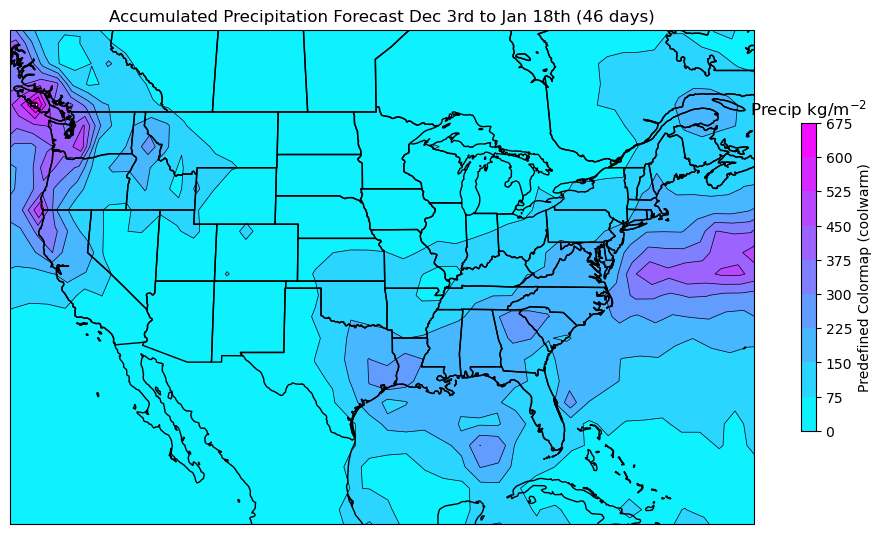

In [10]:
## Now let's make a projected global map plot using cartopy

### set up global map using cartopy
field, lon = add_cyclic_point(data.tp.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000'), coord=data.longitude)
lat = data.latitude
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=-98))
ax.set_extent([-125, -65, 20, 55], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
levels = [0, 75, 150, 225, 300, 375, 450, 525, 600, 675]
# add filled contours
cf = ax.contourf(lon, lat, field, levels=levels, cmap='cool', transform=ccrs.PlateCarree())
# add contour lines
cs = ax.contour(lon, lat, field, colors='k', levels=levels, linewidths=0.5, transform=ccrs.PlateCarree())
# add contour labels
#lb = plt.clabel(cs, fontsize=10, inline=True, fmt='%r');
# add coastlines
ax.coastlines()

# add colorbar including label
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('Precip kg/m$^{-2}$')
cb.set_label('Predefined Colormap (coolwarm)')

# add title
ax.set_title('Accumulated Precipitation Forecast Dec 3rd to Jan 18th (46 days)');

In [11]:
#0-750 levels and get 10 of them? sure
level_list=[]
for i in range(750):
    if i%75==0:
        level_list.append(i)
print(level_list)
    

[0, 75, 150, 225, 300, 375, 450, 525, 600, 675]


### Now we get to do some temp data :D

In [12]:
temp_data = xr.open_dataset("S2S_Data/temp_control.nc")
temp_data

<xarray.Dataset>
Dimensions:            (time: 6, step: 46, latitude: 121, longitude: 240)
Coordinates:
    number             int64 ...
  * time               (time) datetime64[ns] 2024-01-01 ... 2024-06-01
  * step               (step) timedelta64[ns] 1 days 2 days ... 45 days 46 days
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 90.0 88.5 87.0 ... -87.0 -88.5 -90.0
  * longitude          (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time         (time, step) datetime64[ns] ...
Data variables:
    t2m                (time, step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-09T14:42 GRIB to CDM+CF via cfgrib-0.9.1...

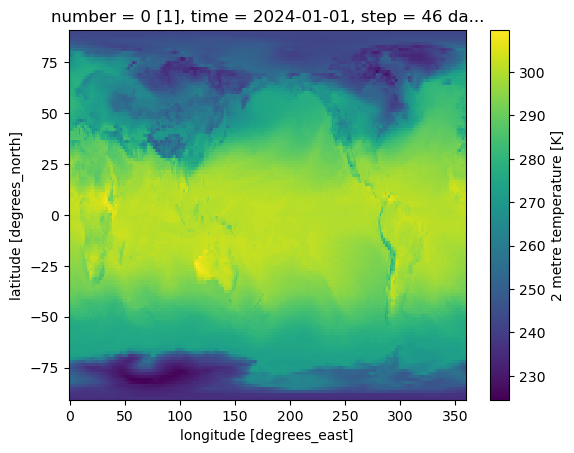

In [16]:
#da.sel(lat=50.5, lon=50.5).plot()
temp_data.t2m.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000').plot()

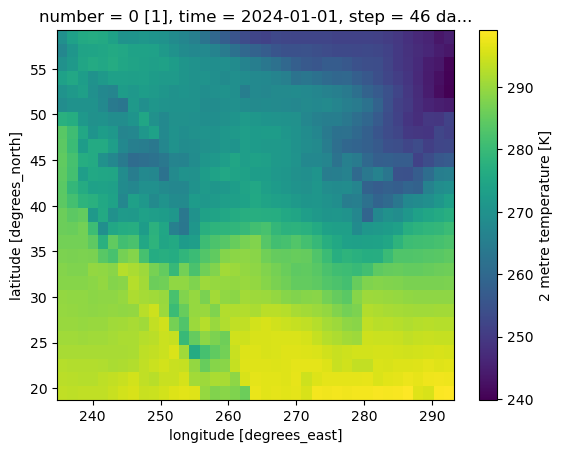

In [17]:
temp_data.t2m.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000',latitude=slice('60','19.5'), longitude=slice('235','293')).plot()
#for degrees west, to convert, take the westward coordinate as a negative value and add 360 degrees.
#for degrees north, keep the same

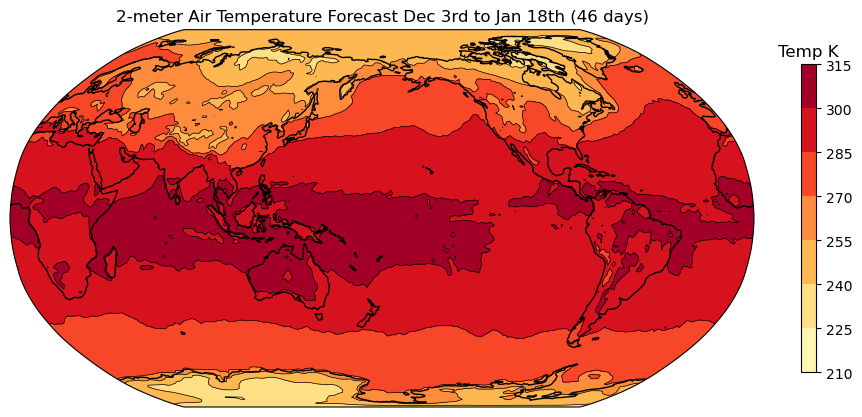

In [18]:
## Now let's make a projected global map plot using cartopy

### set up global map using cartopy
field, lon = add_cyclic_point(temp_data.t2m.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000'), coord=temp_data.longitude)
lat = temp_data.latitude
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

# add filled contours
cf = ax.contourf(lon, lat, field, cmap='YlOrRd', transform=ccrs.PlateCarree());
# add contour lines
cs = ax.contour(lon, lat, field, colors='k', linewidths=0.5, transform=ccrs.PlateCarree())
# add contour labels
#lb = plt.clabel(cs, fontsize=10, inline=True, fmt='%r');
# add coastlines
ax.coastlines()
# add colorbar including label
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('Temp K')
# add title
ax.set_title('2-meter Air Temperature Forecast Dec 3rd to Jan 18th (46 days)');

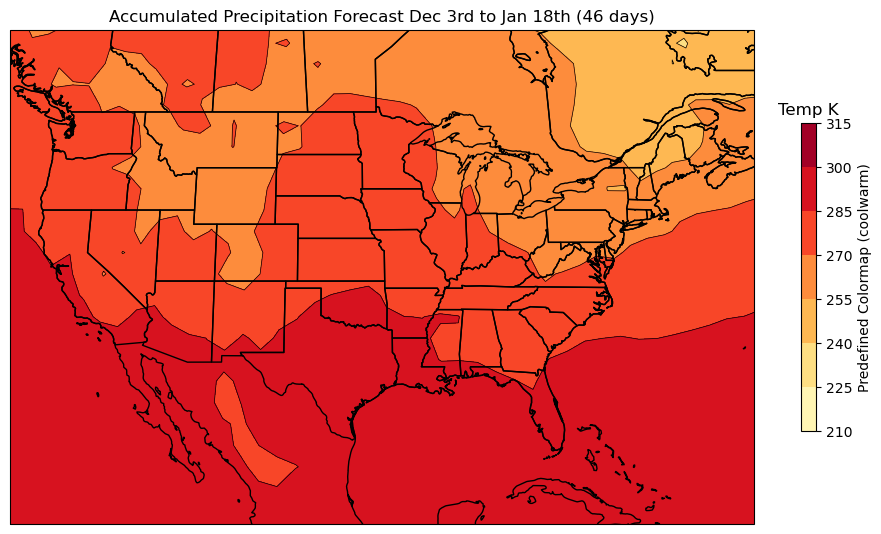

In [19]:
## Now let's make a projected global map plot using cartopy

### set up global map using cartopy
field, lon = add_cyclic_point(temp_data.t2m.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000'), coord=temp_data.longitude)
lat = temp_data.latitude
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=-98))
ax.set_extent([-125, -65, 20, 55], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
#levels = [0, 75, 150, 225, 300, 375, 450, 525, 600, 675]
# add filled contours
cf = ax.contourf(lon, lat, field, cmap='YlOrRd', transform=ccrs.PlateCarree())
# add contour lines
cs = ax.contour(lon, lat, field, colors='k', linewidths=0.5, transform=ccrs.PlateCarree())
# add contour labels
#lb = plt.clabel(cs, fontsize=10, inline=True, fmt='%r');
# add coastlines
ax.coastlines()

# add colorbar including label
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('Temp K')
cb.set_label('Predefined Colormap (coolwarm)')

# add title
ax.set_title('Accumulated Precipitation Forecast Dec 3rd to Jan 18th (46 days)');